# Text Mining: Word Association
### Josh Iden 
### 03/17/23

Presentation [link](https://youtu.be/gDwOBSfp4ec)

## 1. Choose a Corpus of Interest

This assignment will use the Brown corpus from [nltk.org](https://www.nltk.org/). The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, etc. I am taking a random sample from the corpus, as the full corpus is computationally cumbersome on my machine. 

In [1]:
import nltk
from nltk.corpus import brown
import random
import re
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Unique Words in the Corpus

In [2]:
%%time
# total words in corpus
words = brown.words()
len(words)

CPU times: user 3.14 s, sys: 209 ms, total: 3.35 s
Wall time: 3.54 s


1161192

In [3]:
words = random.sample(list(words), 10000)

In [4]:
%%time 
total_words = len(words)
total_words

CPU times: user 24 µs, sys: 1 µs, total: 25 µs
Wall time: 30 µs


10000

The `set` function will return a number of unique words, but this doesn't take into account different cases (upper or lower) or words that contain numbers, so I'll run the function on a list comprehension that accounts for these characteristics. 

In [5]:
len(set(words))

3432

In [6]:
total_unique = len(set([word.lower() for word in words if word.isalpha()]))
total_unique

3023

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [7]:
words = [word.lower() for word in words if word.isalpha()]
nltk.FreqDist(words).most_common()[:5]

[('the', 606), ('of', 329), ('and', 285), ('to', 229), ('in', 193)]

In [9]:
half = total_words / 2

total = 0
num_words = 0

for word, freq in nltk.FreqDist(words).most_common():
    if total < half:
        total += freq
        num_words += 1
    else: 
        pass
        
print("Total words: {}".format(total_words))
print("Fifty percent: {}".format(half))
print("{} most common unique words represent {} total words".format(num_words, total))

Total words: 10000
Fifty percent: 5000.0
257 most common unique words represent 5000 total words


In [10]:
sum(sorted(dict(nltk.FreqDist(words)).values(), reverse=True)[:num_words])

5000

## 4. Identify the 200 highest frequency words in this corpus

In [11]:
header = ['Word','Freq']  
print(tabulate(nltk.FreqDist(words).most_common()[:200], header, tablefmt="grid"))

+------------+--------+
| Word       |   Freq |
+============+========+
| the        |    606 |
+------------+--------+
| of         |    329 |
+------------+--------+
| and        |    285 |
+------------+--------+
| to         |    229 |
+------------+--------+
| in         |    193 |
+------------+--------+
| a          |    174 |
+------------+--------+
| that       |     96 |
+------------+--------+
| was        |     95 |
+------------+--------+
| he         |     85 |
+------------+--------+
| for        |     84 |
+------------+--------+
| is         |     82 |
+------------+--------+
| with       |     66 |
+------------+--------+
| on         |     64 |
+------------+--------+
| this       |     53 |
+------------+--------+
| it         |     52 |
+------------+--------+
| his        |     50 |
+------------+--------+
| i          |     47 |
+------------+--------+
| as         |     46 |
+------------+--------+
| be         |     46 |
+------------+--------+
| at         |  

## 5. Create a graph that shows the relative frequency of these 200 words.

In [12]:
hf = dict(nltk.FreqDist(words).most_common()[:200])

x = []
y = []
for word, freq in hf.items():
    rf = round(freq/len(words), 4)
    x.append(word)
    y.append(rf)

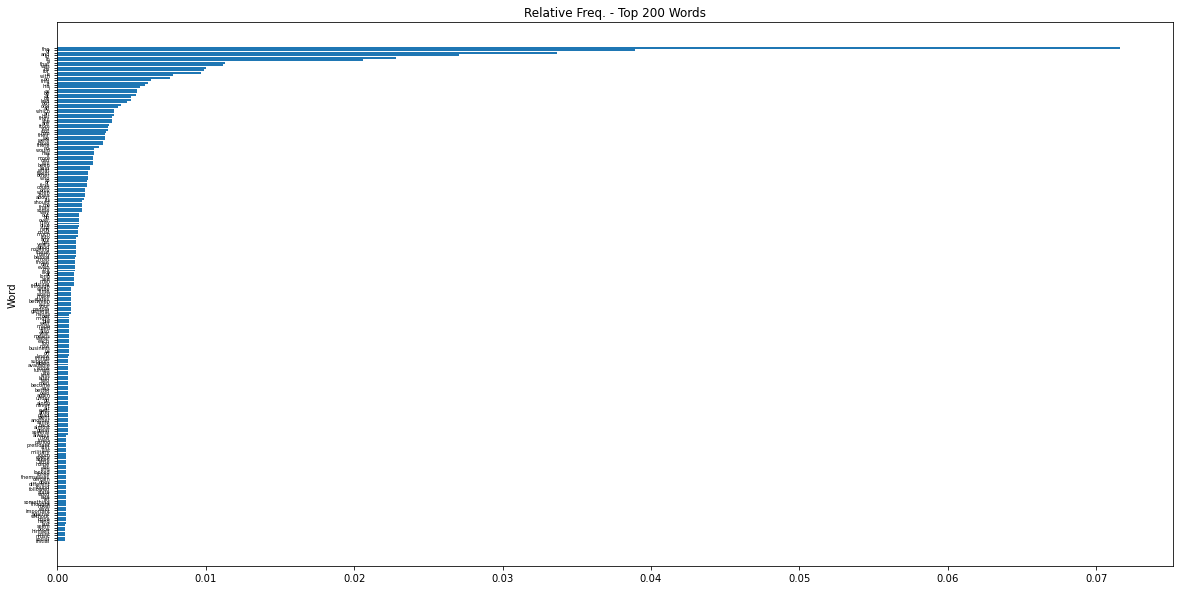

In [13]:
plt.figure(figsize=[20,10])
x.reverse() # reverses the lists so y-axis will display from highest to lowest
y.reverse()
plt.barh(x, y)
plt.yticks(fontsize=5)
plt.title("Relative Freq. - Top 200 Words")
plt.ylabel("Word")

plt.show();

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's Law states that when words are ranked according to their frequencies in a large enough collection of texts and then the frequency is plotted against the rank, the result is a logarithmic curve. (Or if you graph on a log scale, the result is a straight line.)

Although this is a random sample of the original corpus, you can observe that the frequencies do appear to occur as half of the larger value, meaning the second largest frequency is roughly half the size of the largest, and so on. I believe if we were looking at the full corpus, this distribution would move even more in line with Zipf's law. 

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

These words are specific to print text and not conversation/audio transcription. They are a representation of the kinds of words that were commonly used in writing during very specific time periods. For example, an article written during the 1960s would perhaps feature a higher frequency of different kinds of words than an article written in the 2000s. However, the highest frequency are articles (the) and prepositions (of, to), and are less likely to affected by linguistic trends. Therefore I think the frequency of the words in this corpus, at least with respect to the sample we are looking at, are reasonably representative of what I expect the frequency of all words in the corpora to look like. 